## Implementing Linear Regression for NAC Dataset

This is a template for the DataLab day on Tuesday of Week 8. 

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this task is to build a linear regression model for the NAC dataset. 

It is your own responsibilty to choose the predictors (features) and the response variable.

In [69]:
# Put your code here (3 lines of code)
# Import the required packages: numpy, pandas, matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Player                               0
Team                               625
Team within selected timeframe       0
Position                            56
Age                                  8
                                  ... 
Direct free kicks per 90          1510
Direct free kicks on target, %    1510
Corners per 90                     232
Penalties taken                      0
Penalty conversion, %                0
Length: 114, dtype: int64
0        21.967858
1        22.204082
2        25.746944
3        21.301775
4        20.603780
           ...    
16530    21.224490
16531    23.374726
16532    23.765432
16533          inf
16534          inf
Name: BMI Index, Length: 16535, dtype: float64
0               NaN
1               NaN
2               NaN
3         500k - 1M
4         500k - 1M
            ...    
16530    under 500k
16531    under 500k
16532    under 500k
16533    under 500k
16534    under 500k
Name: Market_Value_bin, Length: 16535, dtype: category
Categories (2,

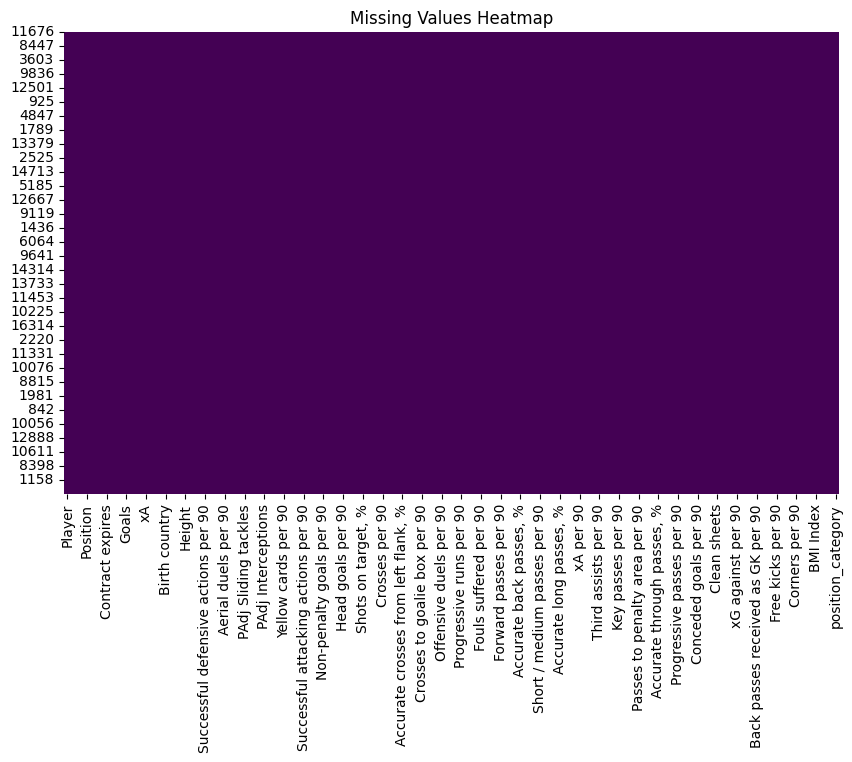

In [70]:
# Load the NAC dataset in this cell
# Decide about the features and the response variable
# Normalize your data (important!)
# For normalizing data you can use the scikit-learn
nacdata = pd.read_csv('combined.csv')
nacdata


import seaborn as sns
missing_values = nacdata.isnull().sum()
print(missing_values)

# Remove the duplicate rows
nacdata = nacdata.drop_duplicates()

# Creating new column to calculate Body Mass Index
nacdata['BMI Index'] = (nacdata['Weight']/((nacdata['Height']/100)**2))

# Replace NaN values with a specific value for each column based on its data type
for column in nacdata.columns:
    #Check what type of data is each column and fill the missed value with the mean of the column with numeric data and unknown for other types of data
    if nacdata[column].dtype == 'float64':
        nacdata[column].fillna(nacdata[column].mean(), inplace=True)  # Replace NaN with mean of the column for float columns
    elif nacdata[column].dtype == 'object':
        nacdata[column].fillna('unknown', inplace=True)  # Replace NaN with 'unknown' for object columns

# Prints the BMI
print(nacdata['BMI Index'])

# Bins and Labels to divide players under 500k and 500k-1M
market_value_bins = [0, 500000, 1000000]
market_value_labels = ['under 500k', '500k - 1M']

# Creating column with the Market Value Bins
nacdata['Market_Value_bin'] = pd.cut(nacdata['Market value'], bins=market_value_bins, labels=market_value_labels, right=False)
print(nacdata['Market_Value_bin'])

# Split the positions and keep only the first one
nacdata['first_position'] = nacdata['Position'].str.split(',').str[0]

# Bins to classify player positions by Attacker, Midfielder, Defender and Goalkeeper
Attacker = ['CF', 'LWF', 'RWF', 'LW', 'RW']
Midfielder = ['AMF', 'LAMF', 'RAMF', 'RDMF', 'RCMF', 'LCMF', 'DMF', 'LDMF', 'RDMF']
Defender = ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']
Goalkeeper = ['GK']

# Function to check each position to which category belongs to
def Position_category(position):
    if position in Attacker:
        return 'Attacker'
    elif position in Midfielder:
        return 'Midfielder'
    elif position in Defender:
        return 'Defender'
    elif position in Goalkeeper:
        return 'Goalkeeper'
    else:
        return 'Not Defined'
    
# Create a new column 'position_category' based on the classification
nacdata['position_category'] = nacdata['first_position'].apply(Position_category)

# Display the DataFrame with the new 'position_category' column
print(nacdata[['first_position', 'position_category']])

# Filter the data to plot players only under Market value of 1M
nacdata = nacdata[nacdata['Market value']<1000000]

# Create dataFrame attackers_df with data only for attackers
attacker_df = nacdata[nacdata['position_category'] == 'Attacker'].copy()

# Graphing the missing values into a heatmap
nacdata_sample = nacdata.sample(frac=0.5, random_state=42)
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(nacdata_sample.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [71]:
# Below you can see an example for the house-price dataset
# You need to the the same for NAC dataset

# data = pd.read_csv('house-prices.csv')
# X = data[['SqFt', 'Bedrooms', 'Bathrooms']].to_numpy()
# Y = data['Price'].to_numpy()
X = attacker_df[['Age', 'Goals', 'Successful attacking actions per 90', 'Shots on target, %', 'Shots per 90','Crosses per 90','Accurate crosses, %','Dribbles per 90', 'Successful dribbles, %', 'Received long passes per 90']]  # Independent variables
Y = attacker_df['xG per 90']

# You can normalize data by your own code or use scikit-learn to do it
X = (np.max(X, axis=0) - X)/(np.max(X, axis=0) - np.min(X, axis=0)) 
Y = (np.max(Y, axis=0) - Y)/(np.max(Y, axis=0) - np.min(Y, axis=0)) 

### Imprtant Note

To use this template for building your model, X should be a two-dimensional numpy array, and Y should be a one-dimensional numpy array. 

In [72]:
# Define the number of observations and the features (predictors)
# m denotes the number of observations
m = X.shape[0]

# p denotes the number of features
p = X.shape[1]

You have to add 1 to the related row for each observation; i.e. we need to change X to the following form:

$$ X= \left[ \begin{array}{ccccc} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_p^{(1)}  \\  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_p^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_p^{(m)}  \end{array} \right]$$

In [73]:
# Put your code here (1 line of code)
# Add 1 to each row of X (you can use np.insert)
X = X = np.insert(X, 0, 1, axis=1)

print(X)

[[1.         0.76       0.83333333 ... 0.74       0.4643     0.65775401]
 [1.         0.8        1.         ... 0.80166667 0.2143     0.86452763]
 [1.         0.68       0.66666667 ... 0.89388889 0.5385     0.62032086]
 ...
 [1.         0.76       1.         ... 0.76333333 0.4545     0.885918  ]
 [1.         0.56       0.8        ... 0.81388889 0.4853     0.74509804]
 [1.         0.84       0.86666667 ... 0.81722222 0.5517     0.73796791]]


To proceed further, you need to increase the dimension of Y from 1 to 2 in the following cell:

In [77]:
Y = Y.reshape(-1,1)

print(Y)

[[0.75449102]
 [0.97005988]
 [0.68862275]
 ...
 [0.97005988]
 [0.88023952]
 [0.84431138]]


Use **np.random.seed** to set the seed for the NumPy pseudo-random number generator. The pseudo-random number generator produces sequences of numbers that appear random, but they are actually determined by an initial seed value. By setting the seed, you ensure that you get reproducible results when generating random numbers. Don't change the seed number in the following cell.

In [78]:
np.random.seed(1979)

### Initilize Parameters

Initialize the model parameters with random values. Write a function to initialize the parameters with random values. Note that, due to having an intercept in the linear regression model, the number of parameters should be $p+1$.

In [79]:
def Init_param(p):
    # p (scalar): number of parameters
    
    # Output:
    # W: 1-dimensional numpy array
    
    # Put your code here (1 line of code)
    # Use np.random.rand to initialize the parameters
    # Note that W should have p+1 parameters
    W = np.random.rand(p + 1)
    
    return(W)

Now, let's check your **Init_param** function. Run the followng cell:

In [80]:
Init_param(3)

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

The expected value is as follows:

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

### Define Linear Regression Model

In this section, you will define your linear regression model. The model is as follows:

$$y = xW$$

In [81]:
def LR_model(x, W):
    
    # x: 1-dimensional numpy array containing the features (predictors)
    # W: 1-dimensional numpy array containg the weights of the model
    x = np.insert(x, 0, 1)
    W = np.expand_dims(W, axis=1)
    
    # Put your code here (1 line of code)
    # Implement the linear regression model
    y = np.dot(x, W)
    
    return y

Now, let's check **LR_model** that you have already implemented. Run the following cell:

In [82]:
w = np.array([0.8, 0.7 , -0.5 , 0.3])
x = np.array([0.33,    0.5,    0.7])
LR_model(x, w)

array([0.991])

The expected output is: **array([0.991])**

### Compute Cost Function

In this section, you are supposed to write a function to calculate the cost function. It is better to implement the vectorized form. Actually, you need to implement the following cost function:

$$J(W)=\dfrac{1}{2m}(XW-Y)^\top(XW-Y)$$

In [83]:
def cost_fun(X,Y,W):
    # X: a 2-dimensional numpy array containg all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containg the weights of the model
    
    # Define the number of observations
    m = X.shape[0]
    
    # expand the dimension to be able to perform the matrix multiplication
    W = np.expand_dims(W, axis=1)
    
    # Put your code here (1 line of code)
    # Define the cost function using the vectorized form
    J =  J = (1 / (2 * m)) * np.dot((np.dot(X, W) - Y).T, (np.dot(X, W) - Y))
    
    
    return np.squeeze(J)

Now, let's check your already developed **cost_fun** function by running the following cell. Compare your result with the expected value. 

In [84]:
X1 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
              [1.        , 0.49122807, 0.33333333, 1.        ],
              [1.        , 0.74561404, 0.66666667, 1.        ]])
          
Y1 = np.array([[0.68191414],
              [0.68261787],
              [0.6783955 ]])
          
W1 = np.array([3, 2, -1, 5])
cost_fun(X1,Y1,W1)

array(31.5747073)

The expected value is: **array(31.5747073)**

### Gradient Descent Update Rule

Now, you can implement Gradient Descent update rule utilizing your previousely developed functions. Actually, you have to implement the following rule here:

$$W := W - \alpha \dfrac{1}{m}X^\top(XW-Y)$$

In [85]:
def grad_descent_step(X, Y, W, alf):
    
    # Define the number of observations
    m = X.shape[0]
    
    # Add one dimension to make the matrix multiplication possible
    W = np.expand_dims(W, axis=1)
    
    # Put your code here (1 line of code)
    # Implement the update rule
    W_new = W - alf*(1/m) * np.dot(X.T, (np.dot(X, W) - Y))
    
    return np.squeeze(W_new)

Now, let's check the **grad_descent_step** function. Run the following cell and compare the obtained result with the expected one.

In [86]:
X2 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
              [1.        , 0.49122807, 0.33333333, 1.        ],
              [1.        , 0.74561404, 0.66666667, 1.        ]])
          
Y2 = np.array([[0.68191414],
              [0.68261787],
              [0.6783955 ]])

W2 = np.array([3, 2, -1, 5])

grad_descent_step(X2, Y2, W2, alf=0.001)

array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])

The expected value is as follows:

**array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])**

### Implement Gradient Descent Algorithm

Now, it is time to put together all the previously developed functions to build a linear regression model from scratch.

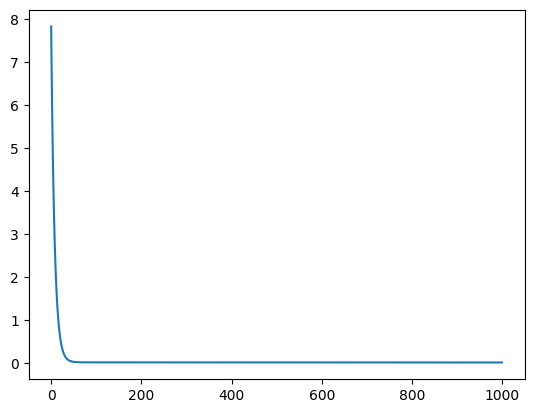

In [87]:
# Put your code here (1 line of code)
# Choose an initial value for model parameters, use Init_param function
w_init = Init_param(p)

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 1000

# Save the values for W and the COST values
W = np.zeros((p + 1, N+1))

COST = np.zeros(N + 1)

# Save initial values
W[:,0] = np.squeeze(w_init)
COST[0] = cost_fun(X, Y, w_init)

# This is for loop to implement the Gradient Descent algorithm
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step to update the values for w
    w_new = grad_descent_step(X, Y, W[:, n], alf)
    
    # Save the new value for w
    W[:, n + 1] = w_new
    
    # Put your code here (1 line of code)
    # Save the cost value for newly obtained w using the cost_fun
    COST[n+1] = cost_fun(X, Y, w_new)

# Plot the results
plt.plot(range(N+1),COST)
plt.show()

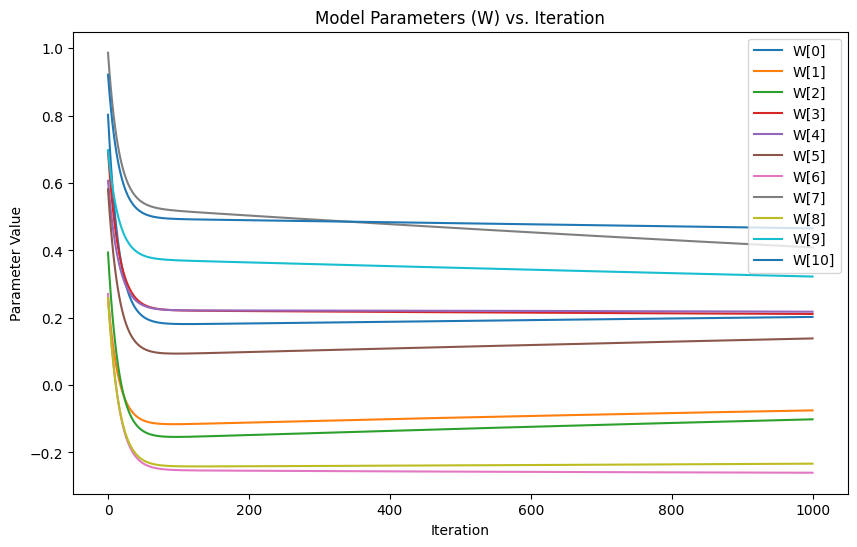

In [88]:
# Illustrate W against iteration in this cell
# Plot the values of W against iteration
plt.figure(figsize=(10, 6))
for i in range(p + 1):
    plt.plot(range(N + 1), W[i, :], label=f'W[{i}]')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Model Parameters (W) vs. Iteration')
plt.legend()
plt.show()

## Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch for the NAC dataset. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

In [92]:
reg.coef_

array([[ 0.        ,  0.00482851,  0.12611909, -0.00842163,  0.09651025,
         0.67842413, -0.1045241 , -0.01428662, -0.10734821, -0.02038307,
         0.04218524]])

In [94]:
reg.intercept_

array([0.30910076])

Note that in our model intercep value is saved in **W[0, :]**. 

If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.
Good Luck!

Find the best Learning Rate to train the model on it

c:\Users\vl4di\anaconda3\envs\block_b\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\vl4di\AppData\Local\Temp\ipykernel_29256\799321637.py:20: RuntimeWarning: overflow encountered in square
  regularization_term = (lam / (2 * m)) * np.sum(W[1:]**2)  # Exclude the bias term from regularization
c:\Users\vl4di\anaconda3\envs\block_b\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\vl4di\anaconda3\envs\block_b\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


Best Learning Rate: 0.01


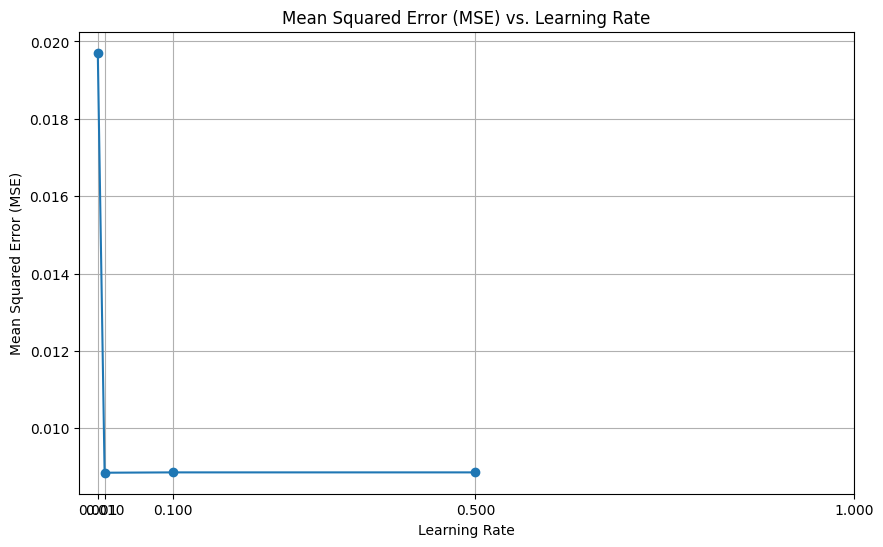

In [121]:
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and response variable
X = attacker_df[['Age', 'Goals', 'Successful attacking actions per 90', 'Shots on target, %', 'Shots per 90','Crosses per 90','Accurate crosses, %','Dribbles per 90', 'Successful dribbles, %', 'Received long passes per 90']]
Y = attacker_df['xG per 90']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a range of learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]

# Define lists to store MSE values for each learning rate
mse_values = []

best_learning_rate = None
best_performance_metric = float('inf')  # Initialize with a large value for MSE, lower is better

# Split the data into training and validation sets
X_train_scaled, mean, std = feature_scaling(X_train)
X_test_scaled = (X_test - mean) / std

for learning_rate in learning_rates:
    # Initialize parameters and hyperparameters
    p = X_train_scaled.shape[1] + 1  # Number of features + 1 (for the intercept term)
    W_init = np.zeros((p, 1))  # Initialize parameters with zeros, reshaped to have shape (p,)
    X_train_scaled_reshaped = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
    regularization_strength = 0.1
    num_iterations = 1000
    # Perform gradient descent with regularization
    W = np.zeros((p, num_iterations + 1))
    COST = np.zeros(num_iterations + 1)
    W[:, 0] = np.squeeze(W_init)
    COST[0] = cost_fun_reg(X_train_scaled_reshaped, Y_train, W[:, 0], regularization_strength)

    for n in range(num_iterations):
        W[:, n + 1] = grad_descent_step_reg(X_train_scaled_reshaped, Y_train, W[:, n], learning_rate, regularization_strength)
        COST[n + 1] = cost_fun_reg(X_train_scaled_reshaped, Y_train, W[:, n + 1], regularization_strength)

    # Evaluate performance on the validation set
    Y_pred_validation = np.dot(np.insert(X_test_scaled.values, 0, 1, axis=1), W[:, -1])
    mse_validation, _ = evaluate_performance(Y_test, Y_pred_validation)
    mse_values.append(mse_validation)

    # Update best_learning_rate if the current learning rate performs better
    if mse_validation < best_performance_metric:
        best_learning_rate = learning_rate
        best_performance_metric = mse_validation

print("Best Learning Rate:", best_learning_rate)
# Plot MSE values for each learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE) vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(learning_rates)
plt.grid(True)
plt.show()

Train the model using gradient descent with the best learning rate that we got - 0.01 and evaluating its performance on the test set.

In [122]:
# Initialize parameters and hyperparameters with the best learning rate
p = X_train_scaled.shape[1] + 1  # Number of features + 1 (for the intercept term)
W_init = np.zeros((p, 1))  # Initialize parameters with zeros, reshaped to have shape (p,)
X_train_scaled_reshaped = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
regularization_strength = 0.1
num_iterations = 1000

# Perform gradient descent with regularization using the best learning rate
W = np.zeros((p, num_iterations + 1))
COST = np.zeros(num_iterations + 1)
W[:, 0] = np.squeeze(W_init)
COST[0] = cost_fun_reg(X_train_scaled_reshaped, Y_train, W[:, 0], regularization_strength)

for n in range(num_iterations):
    W[:, n + 1] = grad_descent_step_reg(X_train_scaled_reshaped, Y_train, W[:, n], best_learning_rate, regularization_strength)
    COST[n + 1] = cost_fun_reg(X_train_scaled_reshaped, Y_train, W[:, n + 1], regularization_strength)

# Evaluate performance on the test set
X_test_scaled_reshaped = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
Y_pred_test = np.dot(X_test_scaled_reshaped, W[:, -1])
mse_test, r2_test = evaluate_performance(Y_test, Y_pred_test)

print("Test Set Performance:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)

Test Set Performance:
Mean Squared Error (MSE): 0.008852867033330143
R-squared (R2): 0.6527300066404886
